In [143]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera

In [144]:
n = 12 #nb des noeuds
k = 20  #nb des itérations
r_sec = 1 #rayon de sécurité

a = 40 #longueur de l'espace
b = 30 #largeur de l'espace
R = ( ((a**2+b**2)**(1/2))/5 )*2 #rayon de détection

print(R)

20.0


$$
\begin{aligned}
&x=\left[\begin{array}{l}
x \\
y
\end{array}\right]\\
&A=\left(a_{i j}\right)_{i, c[i \cdot n+3}\\
&\left.C=\left(a_{i j} / \sum_{i=0}^{\infty-1} a_{i j}\right)=C_{j}\right)
\end{aligned}
$$

Soit un graphe de voisinage composé de n nœuds, et sa matrice d'adjacence A.
 Initialement, les agents sont placés aléatoirement sur un espace de 2 dimensions. 
 Pour se déplacer, chaque agent utilise la matrice de communication qui découle de la matrice d'adajacence. 
 Les agents doivent se rencontrer dans la même zone si après.\\
 
La formule de déplacement des agents à la (k+1) ème itération:
 
 $$
\begin{aligned}
&v_{i}[k+1]=v_{i}[k]+\sum_{j=1}^{N} c_{i j}\left(v_{j}[k]-v_{i}[k]\right)\\
\end{aligned}
$$

$$
\begin{aligned}
&X=\left(x_{i}\right)_{1 \leqslant i<N}\text { ensemble des abscisses des agents  }\\
&Y=\left(y_{i}\right)_{1 \leqslant i<N}\text { ensemble des ordonnées des agents  }\\ 
\end{aligned}
$$

$$
V=\left(v_{i}\right)_{1 \leqslant i\leqslant N} = 
\begin{bmatrix}
x_{i} \\
y_{i} 
\end{bmatrix}
\\
$$

$$
\mathbf{A} =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1N} \\
a_{21} & a_{22} & \cdots & a_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N1} & a_{N2} & \cdots & a_{NN}
\end{bmatrix} =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1N} \\
a_{21} & a_{22} & \cdots & a_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{NN}
\end{pmatrix}\text { Matrice d'adjacence }\\
$$

Avec :


$$
a_{i j}=\left\{\begin{array}{ll}
1  & \text { ; si j voisin de i } \\
0  & \text { ; sinon } \\
0  &  \text { ; si i=j} \\
\end{array}\right.
$$
$$
{\sum_{j=1}^{N} a_{i j}} \neq 0 \text {   càd aucun agent n'est isolé }
$$

$$
C=\left(c_{i j}\right)_{1 \leqslant i \leqslant N,1 \leqslant j \leqslant N}=\left(\frac{a_{i j}}{\sum_{j=1}^{N} a_{i j}}\right)_{1 \leqslant i \leqslant N,1 \leqslant j \leqslant N}\text { Matrice de communication }\\
$$

La première version consiste à regrouper les agents avec une matrice de communication aléatoire sans prendre en considération le rayon de sécurité.\\

La deuxième version consiste à prendre en considération le rayon de détection en actualisant à chaque itération la matrice d'adjacence ainsi que la matrice de communication. \\

La troisième version consiste à prendre en considération le rayon de sécurité ainsi de le rayon de détection  :\\

C'est à dire respecter cette condition :
$$ |x_{j}^{k} - x_{i}^{k} | \times a_{ij} \geq 2 \times r_{sécurité}  $$

In [145]:
def random_adjacency_matrix(n):   
    matrix = [[random.randint(0, 1) for i in range(n)] for j in range(n)]

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    # If i is connected to j, j is connected to i
    for i in range(n):
        for j in range(n):
            matrix[j][i] = matrix[i][j]
    return matrix
    
def random_adjacency_matrix2(n):   
    matrix = [[1 for i in range(n)] for j in range(n)]

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0
        
    return matrix

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

def mouvement1(x,y,C):    
    for i in range(n):
        for j in range(n):
            x[i] += (x[j]-x[i])*C[i][j] 
            y[i] += (y[j]-y[i])*C[i][j]
        
    return x,y
    
def mouvement(x,y,C):    
    for i in range(n):
        for j in range(n):
            if ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2) >= 2*r_sec:
                x[i] += (x[j]-x[i])*C[i][j]
                y[i] += (y[j]-y[i])*C[i][j]
    return x,y

def positionToAdjMatrix(x,y,R):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= R :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


In [146]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

x = rnd.choice(np.arange(0., a, 1), size=n)
y = rnd.choice(np.arange(0., b, 1), size=n)


matrice d'adjacence :
 [[0 1 1 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1]
 [1 1 1 0 0 1 1 0 1 1 0 1]
 [0 1 0 0 1 0 1 1 1 0 1 1]
 [0 0 0 1 1 1 0 1 1 1 1 1]
 [0 0 0 1 0 1 1 0 1 0 1 1]
 [0 0 0 1 1 1 1 1 0 0 1 1]
 [1 0 1 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 1 1 1 1 0 0 1]
 [0 0 0 1 1 1 1 1 1 1 1 0]]


 matrice de communication :
 [[0.         0.25       0.25       0.         0.25       0.
  0.         0.         0.         0.25       0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.33333333
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.         0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.25       0.25       0.25       0.         0.         0.25      ]
 [0.125      0.125      0.125      0.         0.         0.125
  0.125      0.         0.125     

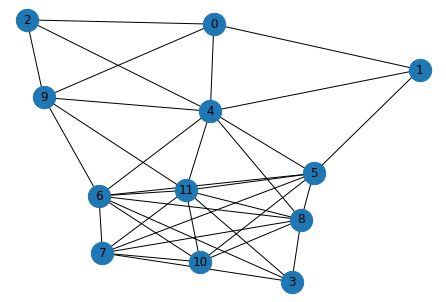

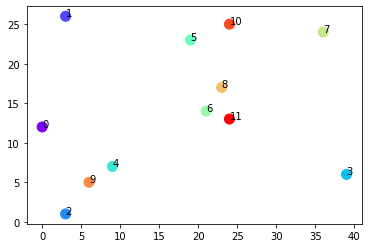

In [147]:
M = positionToAdjMatrix(x,y,R)

#affichage
a = np.array(M)
print("matrice d'adjacence :\n",a.reshape(n,n))

#matrice de communication
C = adjToCom(M)
print("\n\n matrice de communication :\n", C.reshape(n,n))

show_graph_with_labels(a)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(n):
    plt.annotate(i, (x[i], y[i]))

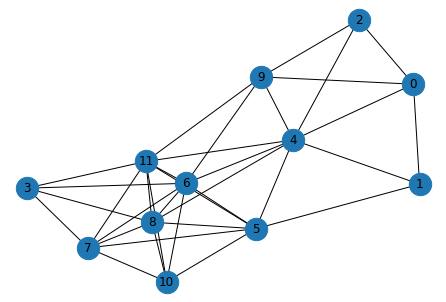

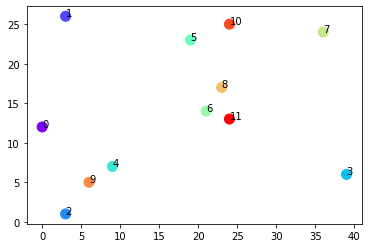

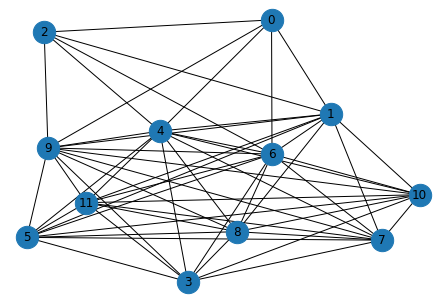

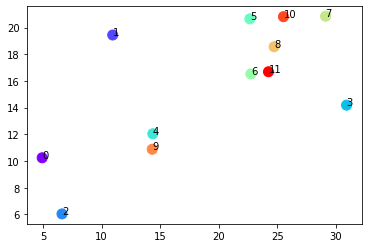

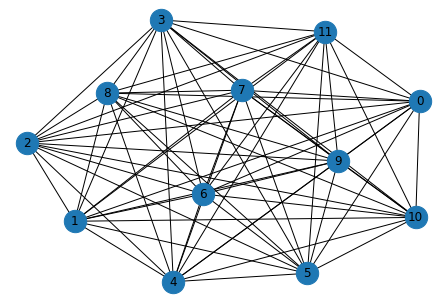

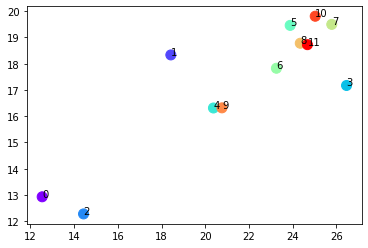

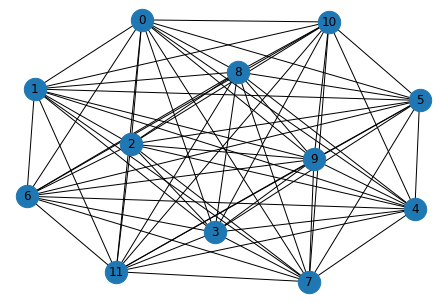

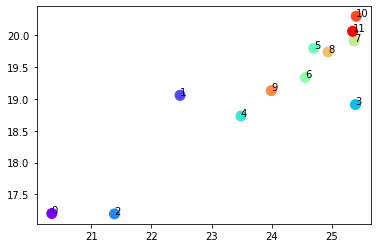

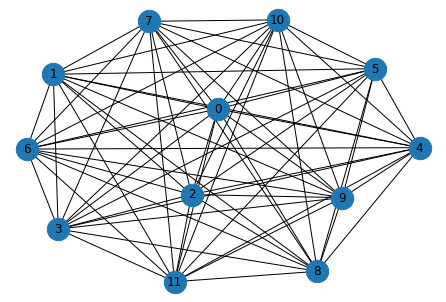

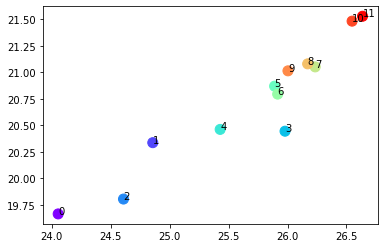

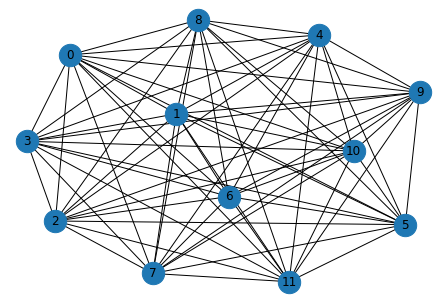

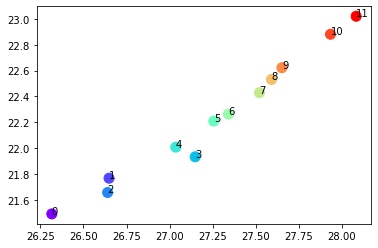

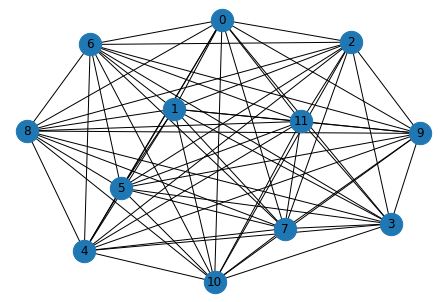

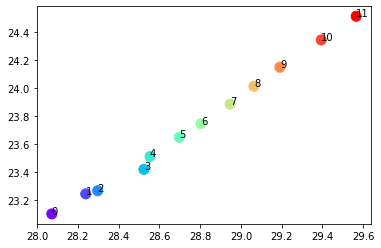

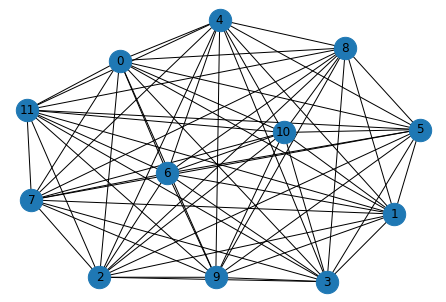

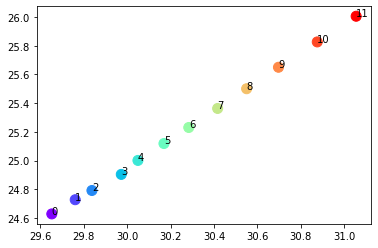

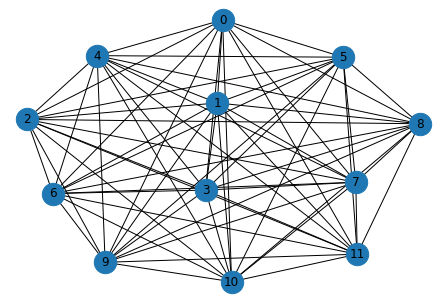

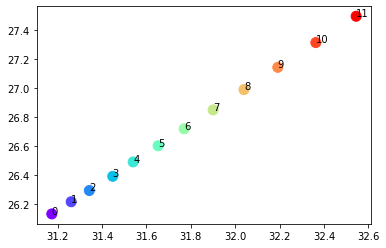

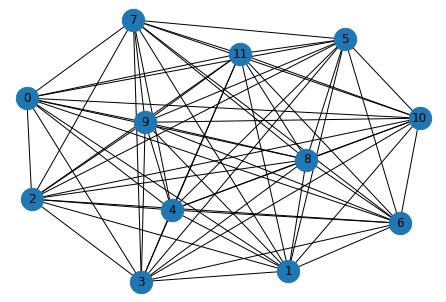

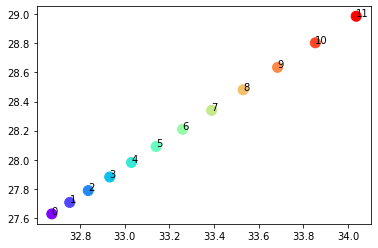

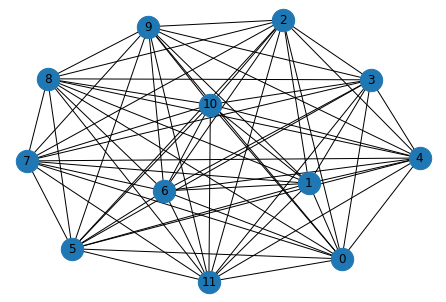

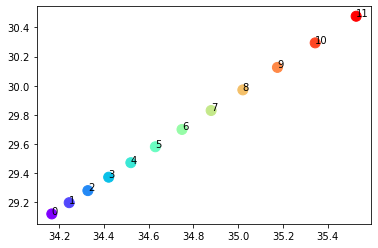

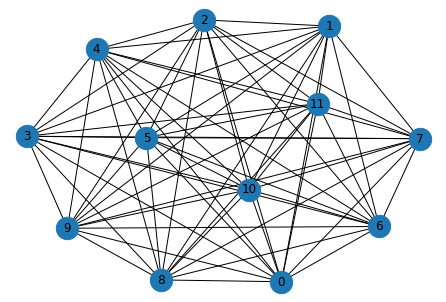

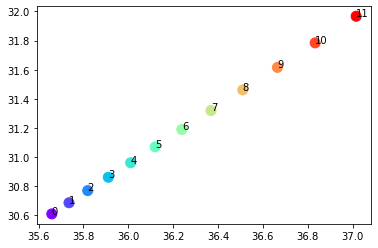

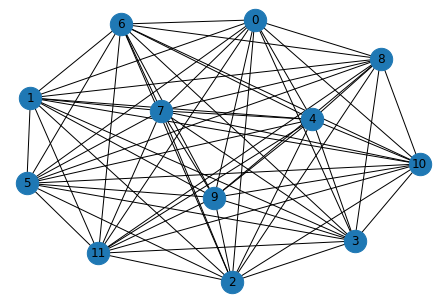

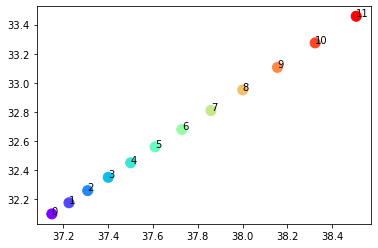

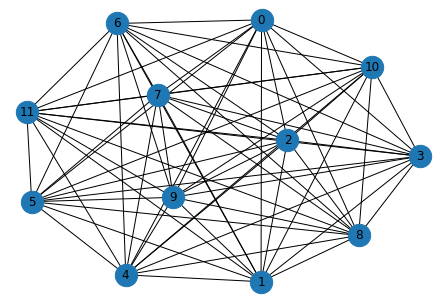

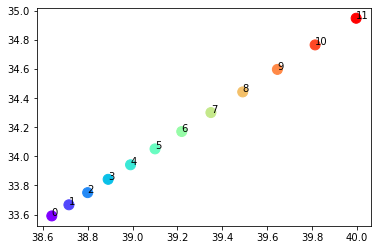

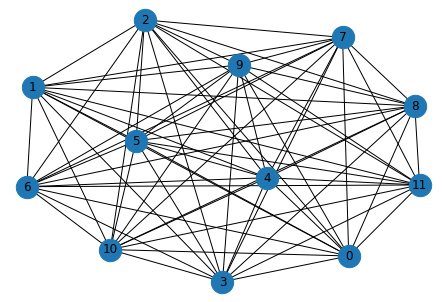

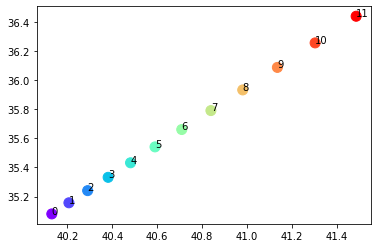

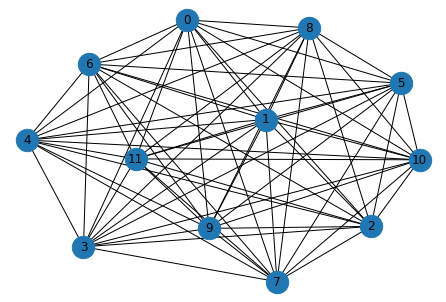

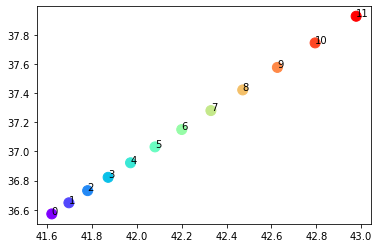

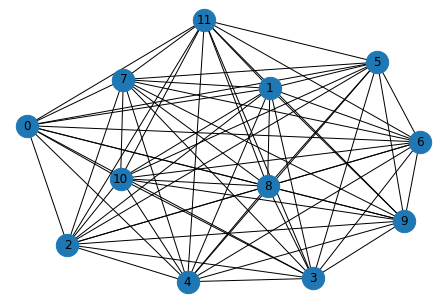

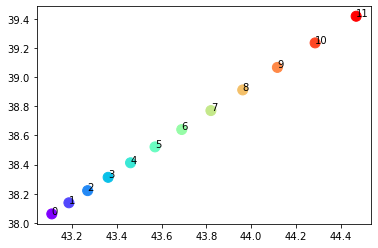

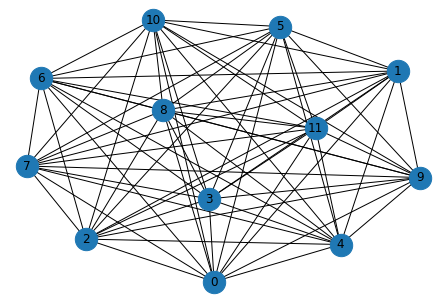

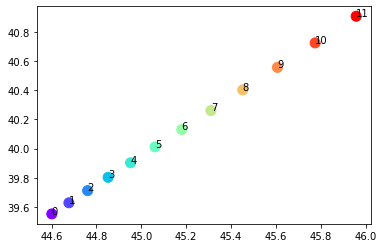

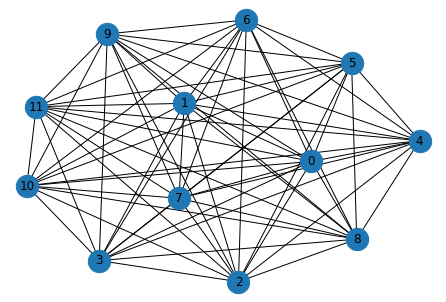

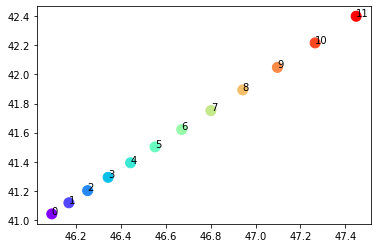

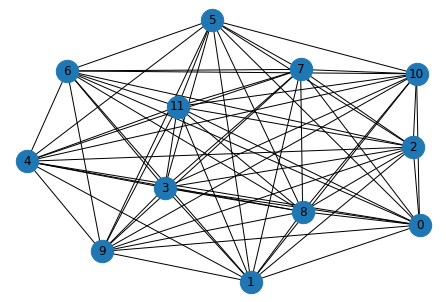

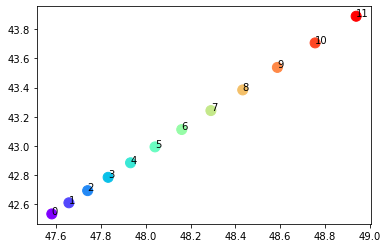

In [148]:
camera = Camera(plt.figure())

#main

for _ in range(k):
    
    M = positionToAdjMatrix(x,y,R)
    C = adjToCom(M)
    show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(n):
        plt.annotate(i, (x[i], y[i]))
        
    x,y = mouvement1(x,y,C)
    
    plt.pause(1.1)
    camera.snap()

anim = camera.animate(blit=True)
anim.save('rdv1.mp4')
